# Hospital Data - Correlation Analysis

This notebook explores correlations between variables in the hospital dataset.

**Datasets:**
- `services_weekly.csv`: Weekly service metrics (beds, patients, satisfaction, morale)
- `staff_schedule.csv`: Staff presence per week
- `staff.csv`: Staff information (role, service)
- `patients.csv`: Patient data (age, satisfaction, service)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Load Data

In [19]:
# Load all datasets
services_df = pd.read_csv('jbi100_app/data/services_weekly.csv')
staff_schedule_df = pd.read_csv('jbi100_app/data/staff_schedule.csv')
staff_df = pd.read_csv('jbi100_app/data/staff.csv')
patients_df = pd.read_csv('jbi100_app/data/patients.csv')

print("Services Weekly:", services_df.shape)
print("Staff Schedule:", staff_schedule_df.shape)
print("Staff:", staff_df.shape)
print("Patients:", patients_df.shape)

Services Weekly: (208, 11)
Staff Schedule: (6552, 6)
Staff: (110, 4)
Patients: (1000, 7)


In [20]:
# Preview each dataset
print("=" * 50)
print("SERVICES WEEKLY")
print("=" * 50)
display(services_df.head())
print("\nColumns:", services_df.columns.tolist())
print("\nData types:")
print(services_df.dtypes)

SERVICES WEEKLY


,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event,acceptance_rate
0,1,1,emergency,32,76,32,44,67,70,none,42.1
1,1,1,surgery,45,130,45,85,83,78,flu,34.6
2,1,1,general_medicine,37,201,37,164,97,43,flu,18.4
3,1,1,ICU,22,31,22,9,84,91,flu,71.0
4,2,1,emergency,28,169,28,141,75,64,none,16.6



Columns: ['week', 'month', 'service', 'available_beds', 'patients_request', 'patients_admitted', 'patients_refused', 'patient_satisfaction', 'staff_morale', 'event', 'acceptance_rate']

Data types:
week                      int64
month                     int64
service                  object
available_beds            int64
patients_request          int64
patients_admitted         int64
patients_refused          int64
patient_satisfaction      int64
staff_morale              int64
event                    object
acceptance_rate         float64
dtype: object


In [21]:
print("=" * 50)
print("STAFF SCHEDULE")
print("=" * 50)
display(staff_schedule_df.head())
print("\nColumns:", staff_schedule_df.columns.tolist())

STAFF SCHEDULE


,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1



Columns: ['week', 'staff_id', 'staff_name', 'role', 'service', 'present']


In [22]:
print("=" * 50)
print("PATIENTS")
print("=" * 50)
display(patients_df.head())
print("\nColumns:", patients_df.columns.tolist())

PATIENTS


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76



Columns: ['patient_id', 'name', 'age', 'arrival_date', 'departure_date', 'service', 'satisfaction']


## 2. Services Weekly - Correlation Matrix

Numeric columns: ['week', 'month', 'available_beds', 'patients_request', 'patients_admitted', 'patients_refused', 'patient_satisfaction', 'staff_morale', 'acceptance_rate']


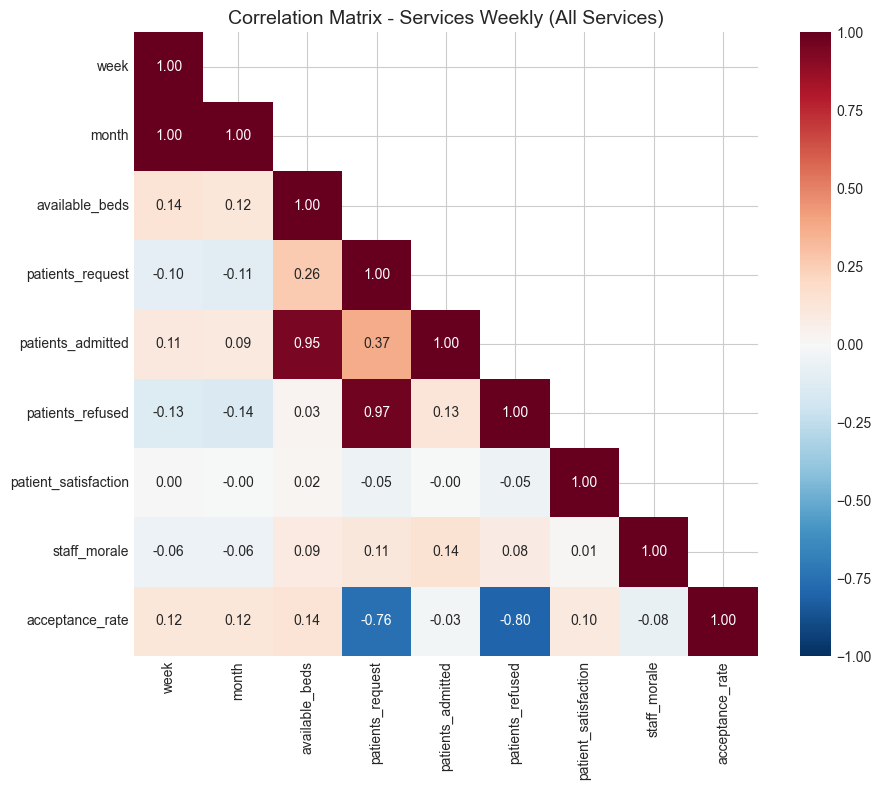

In [23]:
# Select numeric columns from services_weekly
services_numeric = services_df.select_dtypes(include=[np.number])
print("Numeric columns:", services_numeric.columns.tolist())

# Compute correlation matrix
corr_matrix = services_numeric.corr()

# Display correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, vmin=-1, vmax=1, square=True, ax=ax)
plt.title('Correlation Matrix - Services Weekly (All Services)', fontsize=14)
plt.tight_layout()
plt.show()

## 3. Correlation by Department

Departments: ['emergency' 'surgery' 'general_medicine' 'ICU']


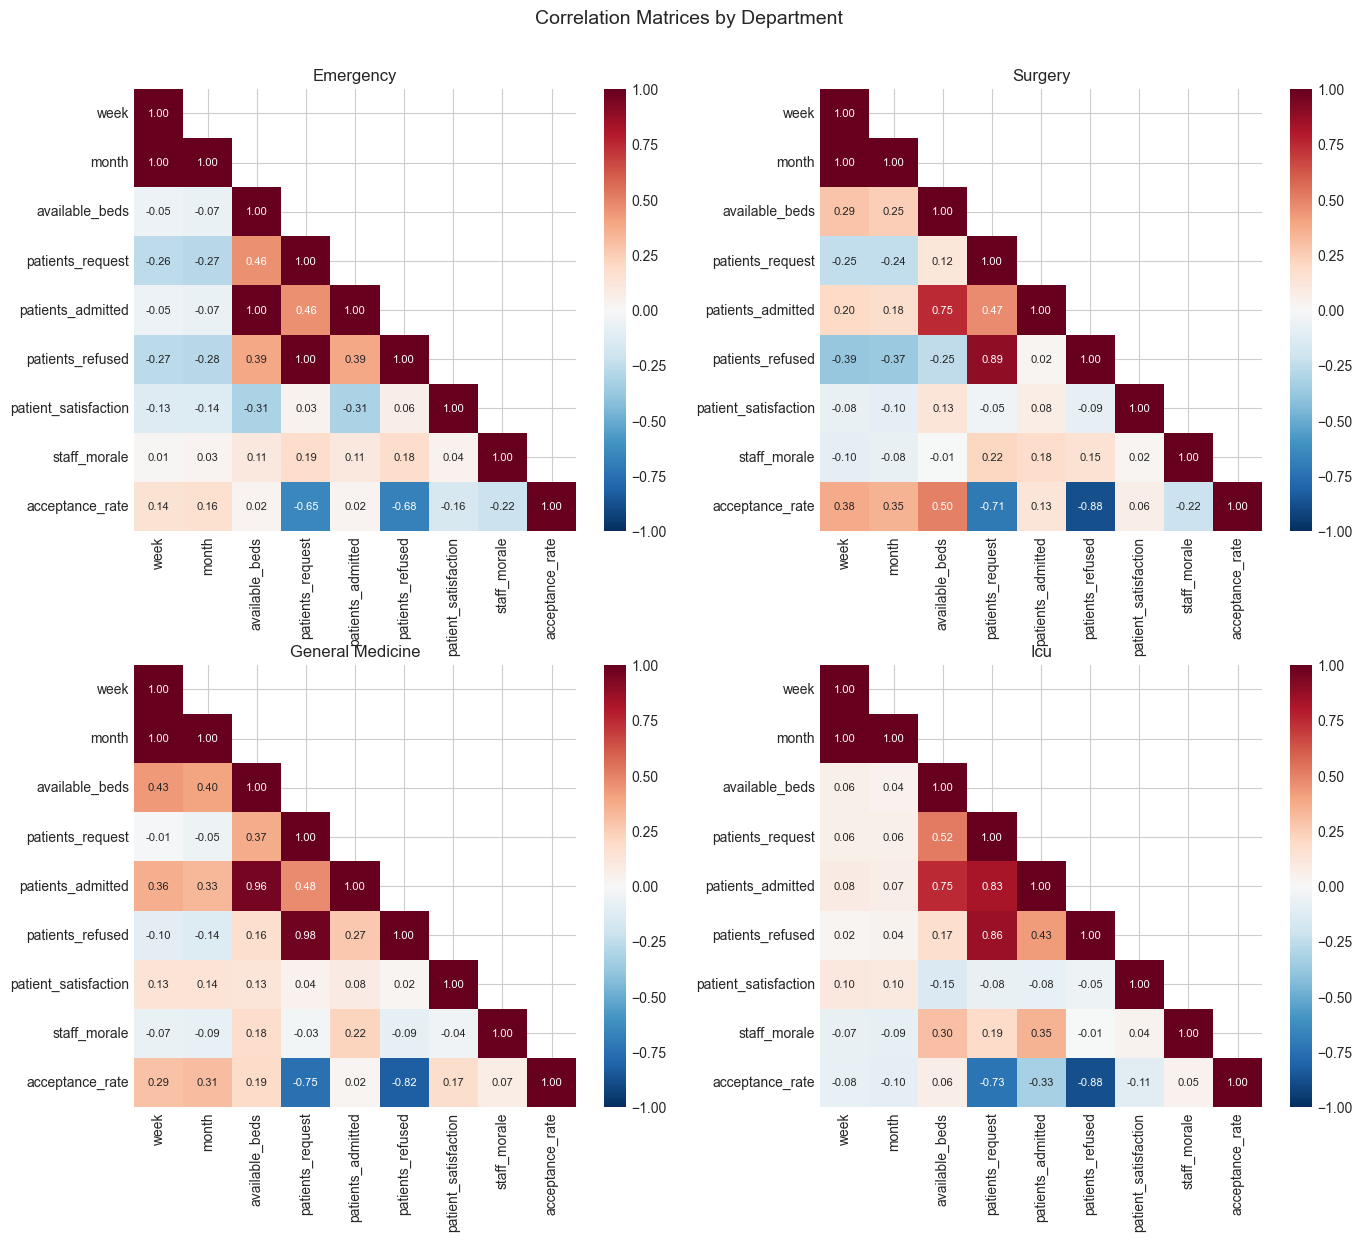

In [24]:
# Get unique services/departments
departments = services_df['service'].unique()
print("Departments:", departments)

# Correlation matrix for each department
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, dept in enumerate(departments):
    dept_data = services_df[services_df['service'] == dept].select_dtypes(include=[np.number])
    corr = dept_data.corr()
    
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, vmin=-1, vmax=1, square=True, ax=axes[idx],
                annot_kws={'size': 8})
    axes[idx].set_title(f'{dept.replace("_", " ").title()}', fontsize=12)

plt.suptitle('Correlation Matrices by Department', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Key Variable Relationships

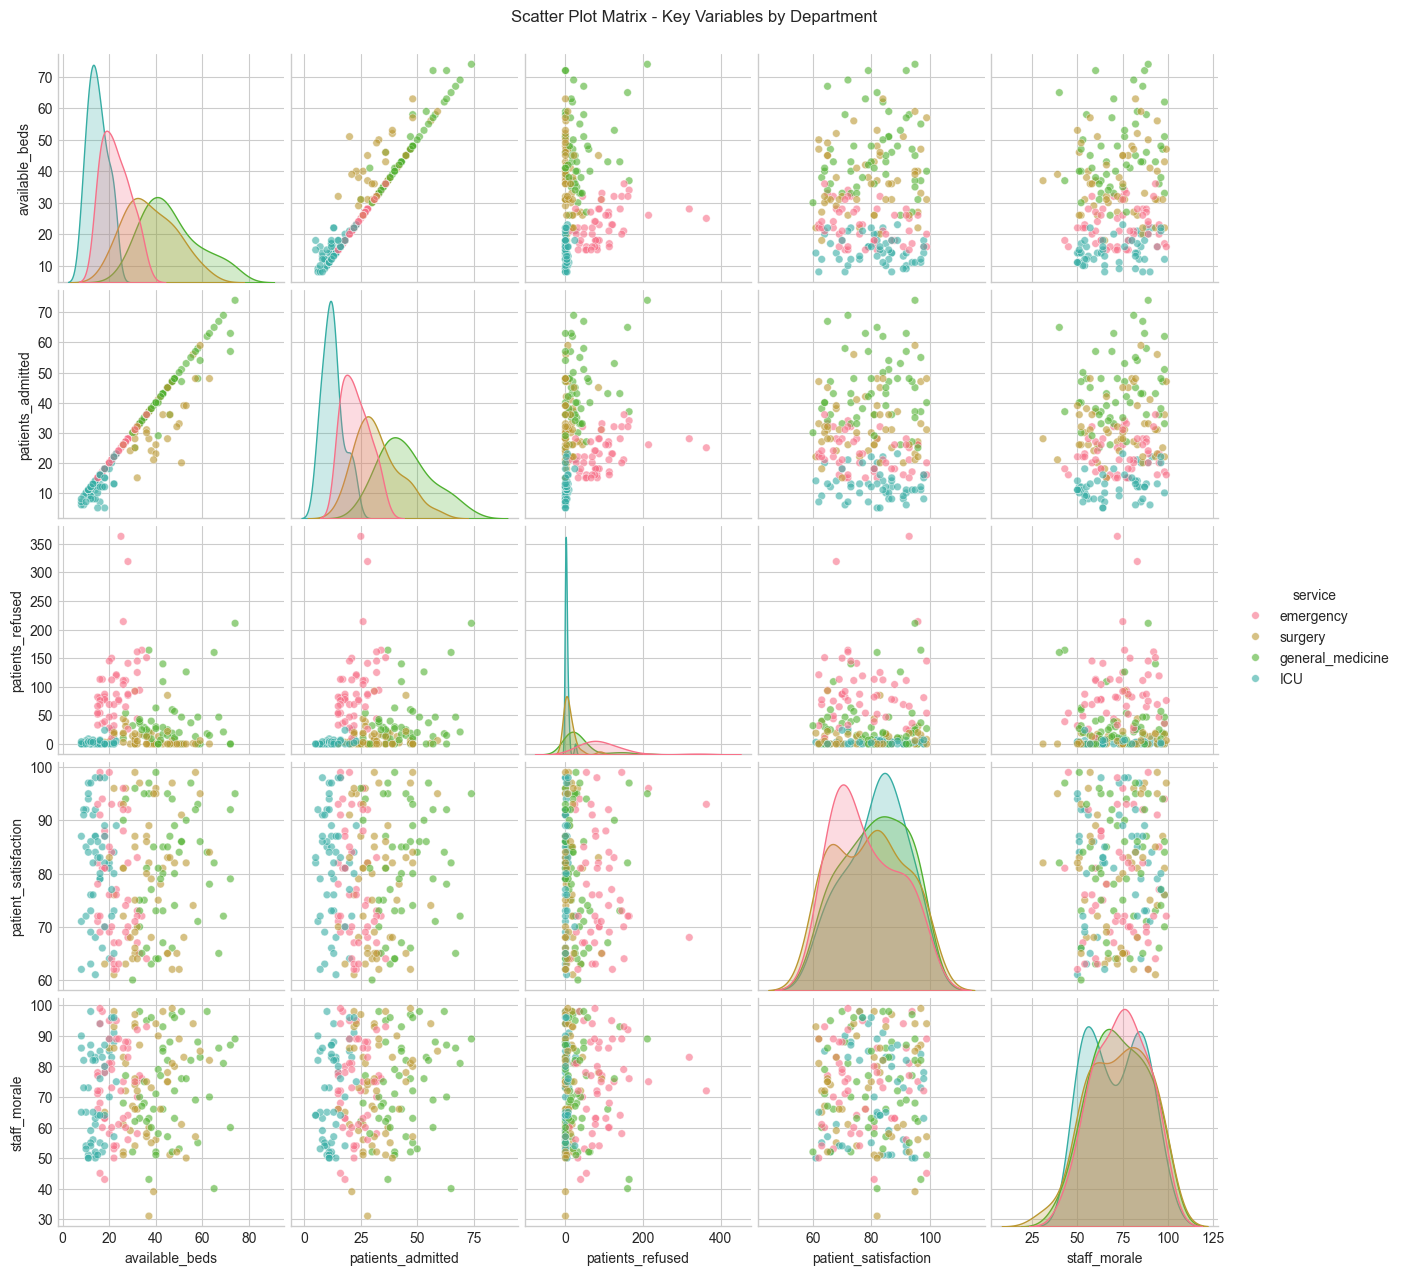

In [25]:
# Scatter plot matrix for key variables
key_vars = ['available_beds', 'patients_admitted', 'patients_refused', 
            'patient_satisfaction', 'staff_morale']

fig = sns.pairplot(services_df[key_vars + ['service']], hue='service', 
                   diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
fig.fig.suptitle('Scatter Plot Matrix - Key Variables by Department', y=1.02)
plt.show()

## 5. Staff Morale vs Patient Satisfaction

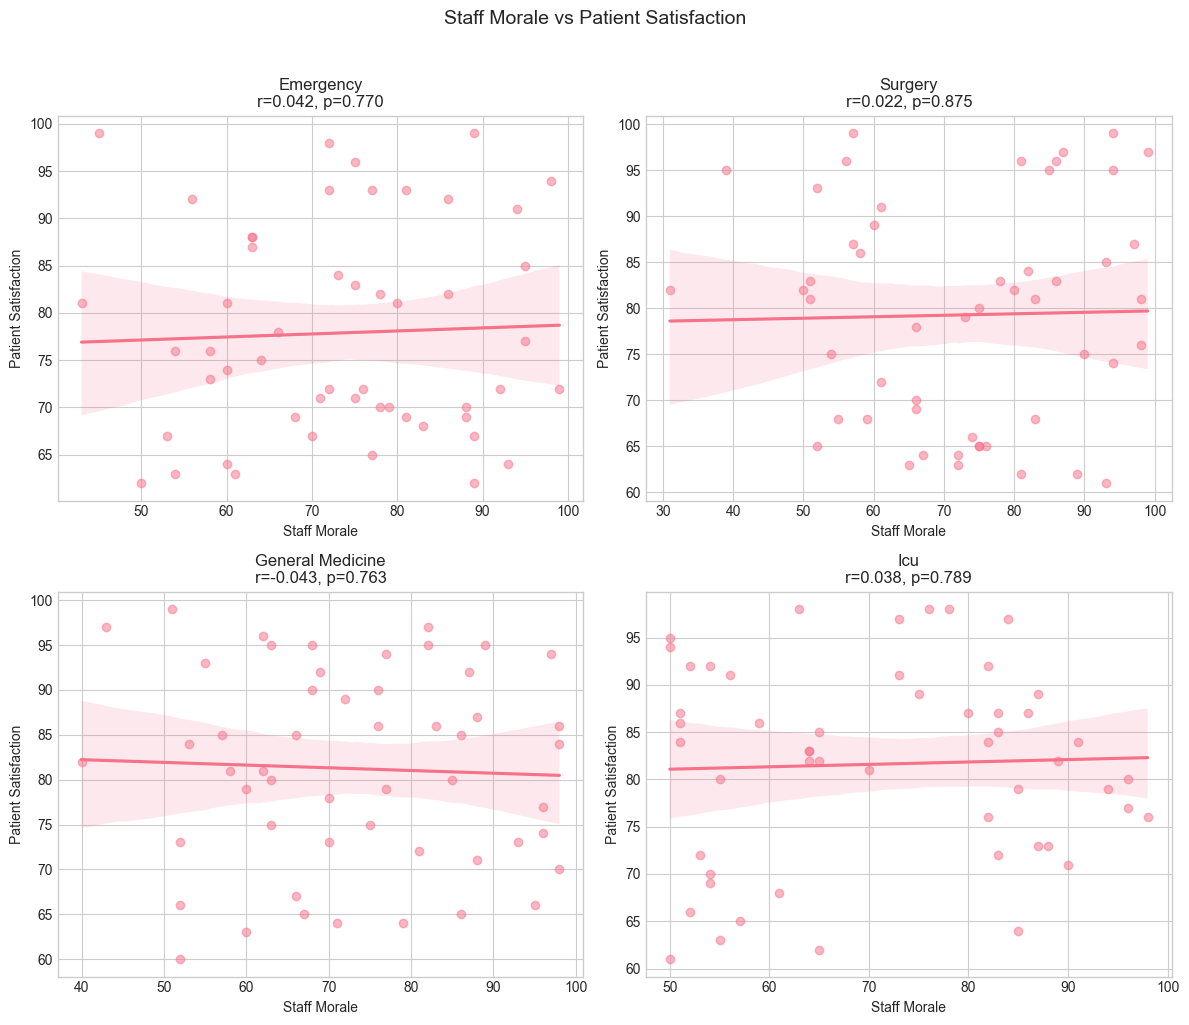

In [26]:
# Morale vs Satisfaction by department
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, dept in enumerate(departments):
    dept_data = services_df[services_df['service'] == dept]
    
    # Scatter with regression line
    sns.regplot(data=dept_data, x='staff_morale', y='patient_satisfaction',
                ax=axes[idx], scatter_kws={'alpha': 0.5})
    
    # Calculate correlation
    corr, p_value = stats.pearsonr(dept_data['staff_morale'], 
                                    dept_data['patient_satisfaction'])
    
    axes[idx].set_title(f'{dept.replace("_", " ").title()}\nr={corr:.3f}, p={p_value:.3f}')
    axes[idx].set_xlabel('Staff Morale')
    axes[idx].set_ylabel('Patient Satisfaction')

plt.suptitle('Staff Morale vs Patient Satisfaction', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 6. Beds and Patient Flow

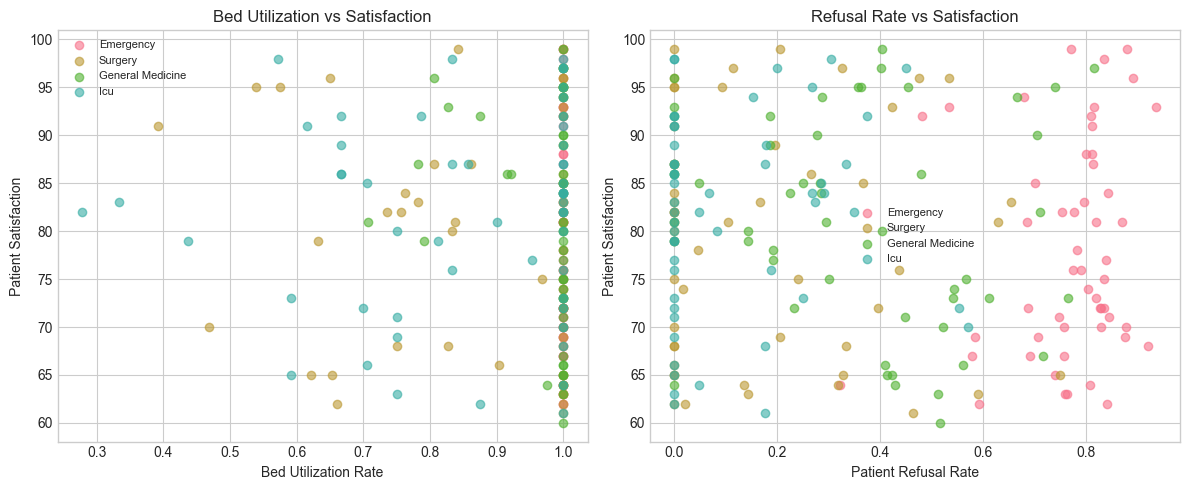

In [27]:
# Calculate bed utilization
services_df['bed_utilization'] = services_df['patients_admitted'] / services_df['available_beds']
services_df['refusal_rate'] = services_df['patients_refused'] / services_df['patients_request']

# Correlation with satisfaction
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bed utilization vs satisfaction
for dept in departments:
    dept_data = services_df[services_df['service'] == dept]
    axes[0].scatter(dept_data['bed_utilization'], dept_data['patient_satisfaction'],
                    label=dept.replace('_', ' ').title(), alpha=0.6)
axes[0].set_xlabel('Bed Utilization Rate')
axes[0].set_ylabel('Patient Satisfaction')
axes[0].set_title('Bed Utilization vs Satisfaction')
axes[0].legend(fontsize=8)

# Refusal rate vs satisfaction
for dept in departments:
    dept_data = services_df[services_df['service'] == dept]
    axes[1].scatter(dept_data['refusal_rate'], dept_data['patient_satisfaction'],
                    label=dept.replace('_', ' ').title(), alpha=0.6)
axes[1].set_xlabel('Patient Refusal Rate')
axes[1].set_ylabel('Patient Satisfaction')
axes[1].set_title('Refusal Rate vs Satisfaction')
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

## 7. Staff Count vs Outcomes

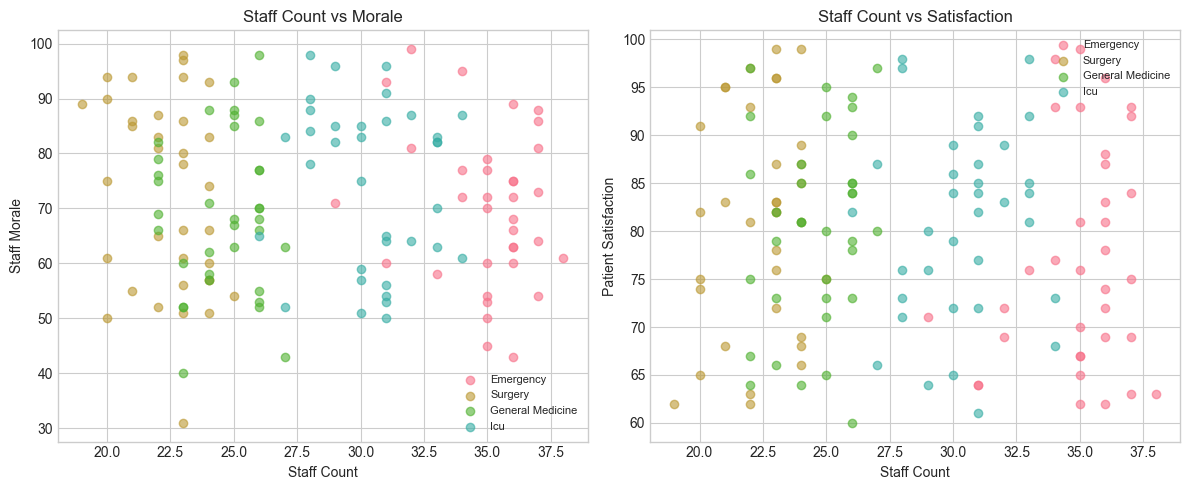


Correlations by Department:
emergency: Staff->Morale: -0.199, Staff->Satisfaction: 0.192
surgery: Staff->Morale: -0.251, Staff->Satisfaction: 0.154
general_medicine: Staff->Morale: 0.004, Staff->Satisfaction: 0.187
ICU: Staff->Morale: -0.117, Staff->Satisfaction: 0.103


In [28]:
# Calculate staff count per week per service
staff_counts = staff_schedule_df[staff_schedule_df['present'] == 1].groupby(
    ['week', 'service']).size().reset_index(name='staff_count')

# Merge with services data
merged_df = services_df.merge(staff_counts, on=['week', 'service'], how='left')

# Correlation: staff count vs morale/satisfaction
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Staff count vs morale
for dept in departments:
    dept_data = merged_df[merged_df['service'] == dept]
    axes[0].scatter(dept_data['staff_count'], dept_data['staff_morale'],
                    label=dept.replace('_', ' ').title(), alpha=0.6)
axes[0].set_xlabel('Staff Count')
axes[0].set_ylabel('Staff Morale')
axes[0].set_title('Staff Count vs Morale')
axes[0].legend(fontsize=8)

# Staff count vs satisfaction
for dept in departments:
    dept_data = merged_df[merged_df['service'] == dept]
    axes[1].scatter(dept_data['staff_count'], dept_data['patient_satisfaction'],
                    label=dept.replace('_', ' ').title(), alpha=0.6)
axes[1].set_xlabel('Staff Count')
axes[1].set_ylabel('Patient Satisfaction')
axes[1].set_title('Staff Count vs Satisfaction')
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print correlations
print("\nCorrelations by Department:")
print("=" * 50)
for dept in departments:
    dept_data = merged_df[merged_df['service'] == dept].dropna()
    corr_morale = dept_data['staff_count'].corr(dept_data['staff_morale'])
    corr_sat = dept_data['staff_count'].corr(dept_data['patient_satisfaction'])
    print(f"{dept}: Staff->Morale: {corr_morale:.3f}, Staff->Satisfaction: {corr_sat:.3f}")

## 8. Staff Role Composition

In [29]:
# Calculate staff by role per week
staff_by_role = staff_schedule_df[staff_schedule_df['present'] == 1].groupby(
    ['week', 'service', 'role']).size().unstack(fill_value=0).reset_index()

# Merge with services
merged_roles = services_df.merge(staff_by_role, on=['week', 'service'], how='left')

# Check available role columns
role_cols = [c for c in merged_roles.columns if c in ['doctor', 'nurse', 'nursing_assistant']]
print("Role columns:", role_cols)

if role_cols:
    # Correlation: role counts vs outcomes
    print("\nCorrelation with Staff Morale:")
    for role in role_cols:
        corr = merged_roles[role].corr(merged_roles['staff_morale'])
        print(f"  {role}: {corr:.3f}")
    
    print("\nCorrelation with Patient Satisfaction:")
    for role in role_cols:
        corr = merged_roles[role].corr(merged_roles['patient_satisfaction'])
        print(f"  {role}: {corr:.3f}")

Role columns: ['doctor', 'nurse', 'nursing_assistant']

Correlation with Staff Morale:
  doctor: -0.037
  nurse: -0.030
  nursing_assistant: -0.093

Correlation with Patient Satisfaction:
  doctor: -0.055
  nurse: -0.114
  nursing_assistant: 0.042


## 9. Event Impact Analysis - Box Plots

Event types:
event
none        164
flu          19
donation     14
strike       11
Name: count, dtype: int64


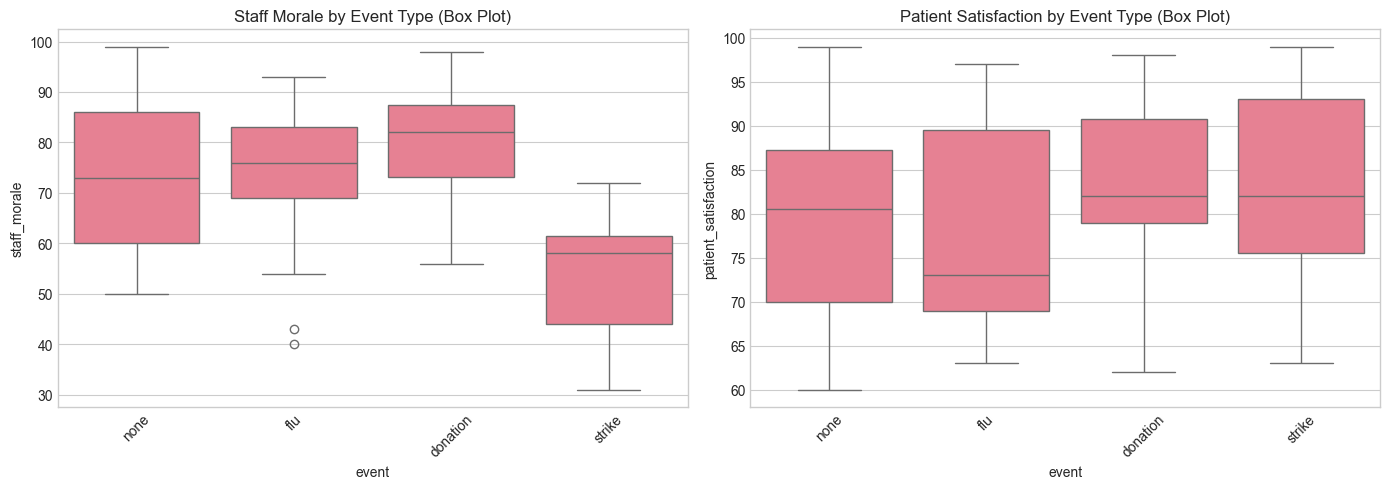

In [30]:
# Check events
print("Event types:")
print(services_df['event'].value_counts())

# Box plot: satisfaction and morale by event type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=services_df, x='event', y='staff_morale', ax=axes[0])
axes[0].set_title('Staff Morale by Event Type (Box Plot)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=services_df, x='event', y='patient_satisfaction', ax=axes[1])
axes[1].set_title('Patient Satisfaction by Event Type (Box Plot)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Event Impact Analysis - Violin Plots

Violin plots show the full distribution shape (density), not just quartiles like box plots.

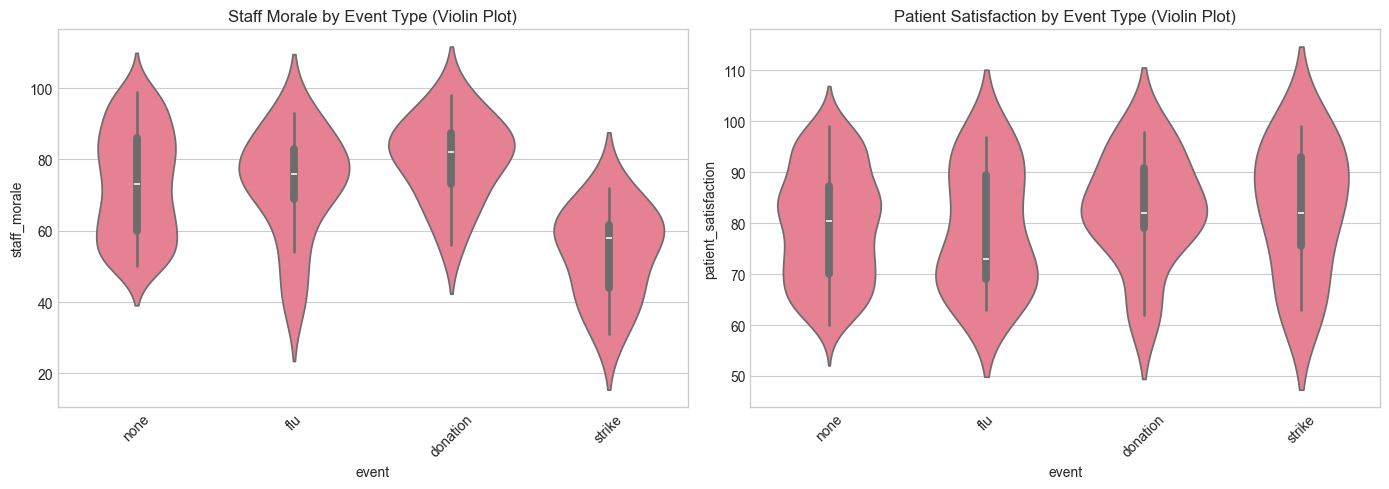

In [31]:
# Violin plot: shows full distribution shape
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.violinplot(data=services_df, x='event', y='staff_morale', ax=axes[0], inner='box')
axes[0].set_title('Staff Morale by Event Type (Violin Plot)')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=services_df, x='event', y='patient_satisfaction', ax=axes[1], inner='box')
axes[1].set_title('Patient Satisfaction by Event Type (Violin Plot)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 11. Distribution by Department - Violin Plots

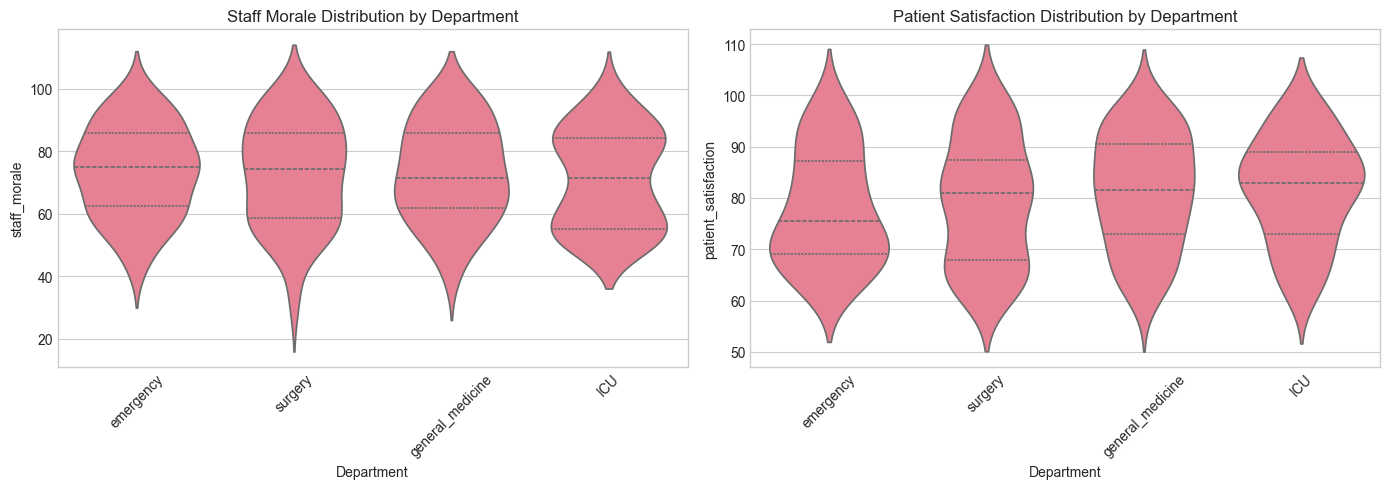

In [32]:
# Violin plots by department
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.violinplot(data=services_df, x='service', y='staff_morale', ax=axes[0], inner='quartile')
axes[0].set_title('Staff Morale Distribution by Department')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('Department')

sns.violinplot(data=services_df, x='service', y='patient_satisfaction', ax=axes[1], inner='quartile')
axes[1].set_title('Patient Satisfaction Distribution by Department')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Department')

plt.tight_layout()
plt.show()

## 12. Patient Data Analysis

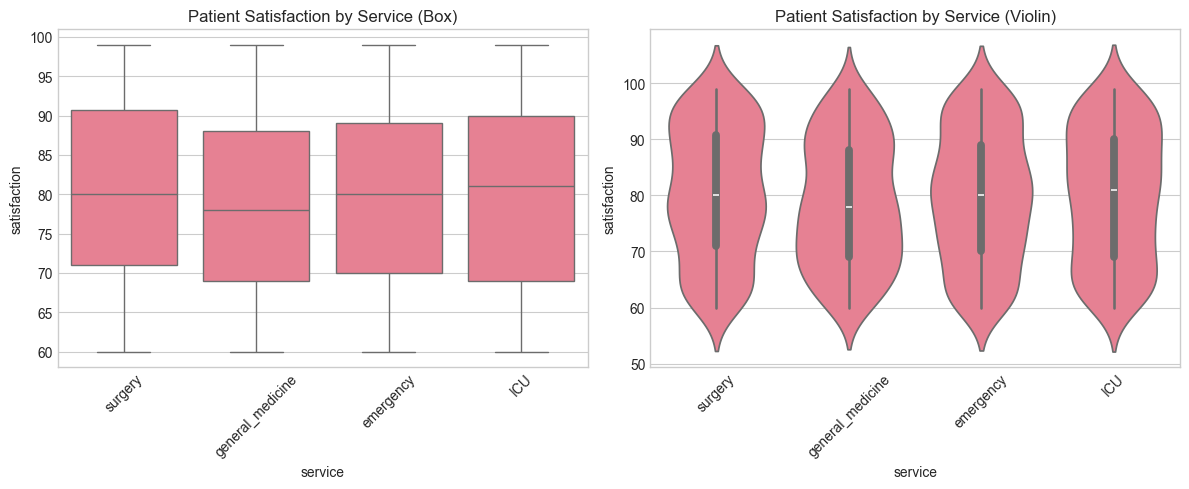

In [33]:
# Patient satisfaction by service - Box plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box plot
sns.boxplot(data=patients_df, x='service', y='satisfaction', ax=axes[0])
axes[0].set_title('Patient Satisfaction by Service (Box)')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot
sns.violinplot(data=patients_df, x='service', y='satisfaction', ax=axes[1], inner='box')
axes[1].set_title('Patient Satisfaction by Service (Violin)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

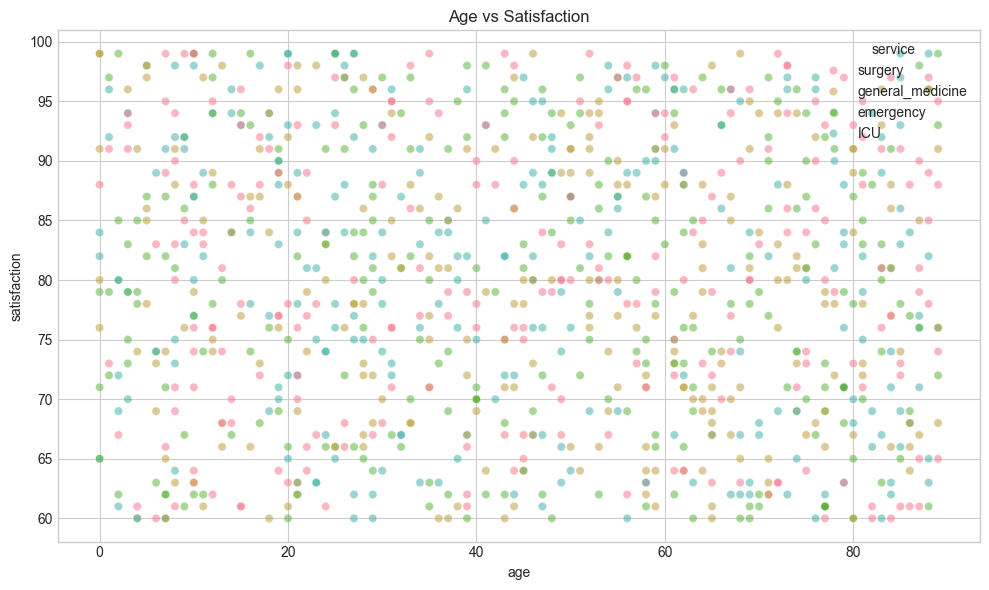


Age vs Satisfaction correlation:
  surgery: -0.001
  general_medicine: -0.095
  emergency: -0.035
  ICU: -0.101


In [34]:
# Age vs satisfaction
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=patients_df, x='age', y='satisfaction', hue='service', alpha=0.5, ax=ax)
ax.set_title('Age vs Satisfaction')
plt.tight_layout()
plt.show()

# Correlation: age vs satisfaction
print("\nAge vs Satisfaction correlation:")
for service in patients_df['service'].unique():
    service_data = patients_df[patients_df['service'] == service]
    corr = service_data['age'].corr(service_data['satisfaction'])
    print(f"  {service}: {corr:.3f}")

## 13. Age Distribution by Service - Violin Plots

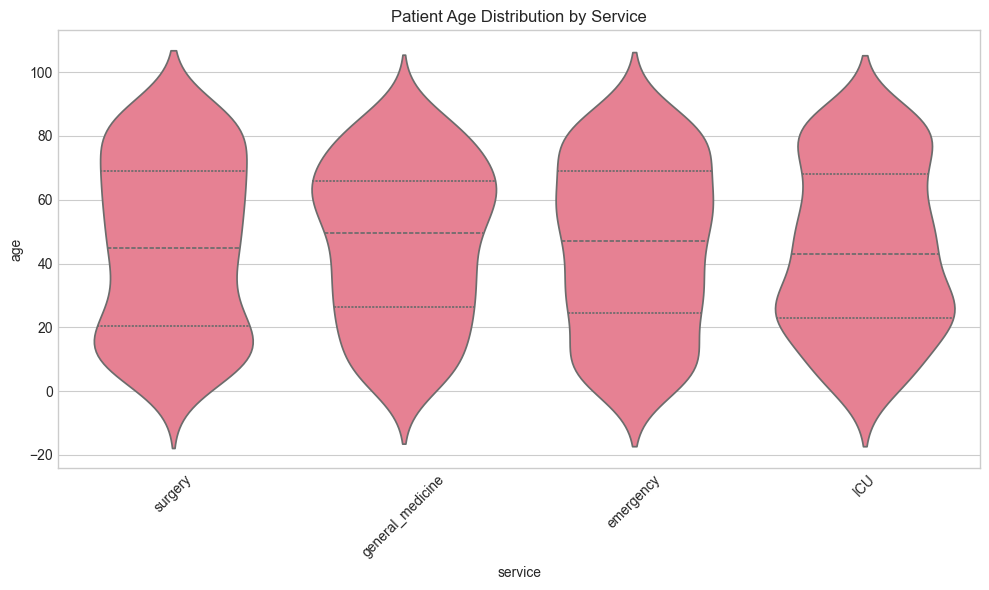

In [35]:
# Age distribution by service
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=patients_df, x='service', y='age', inner='quartile', ax=ax)
ax.set_title('Patient Age Distribution by Service')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 14. Time Series Patterns

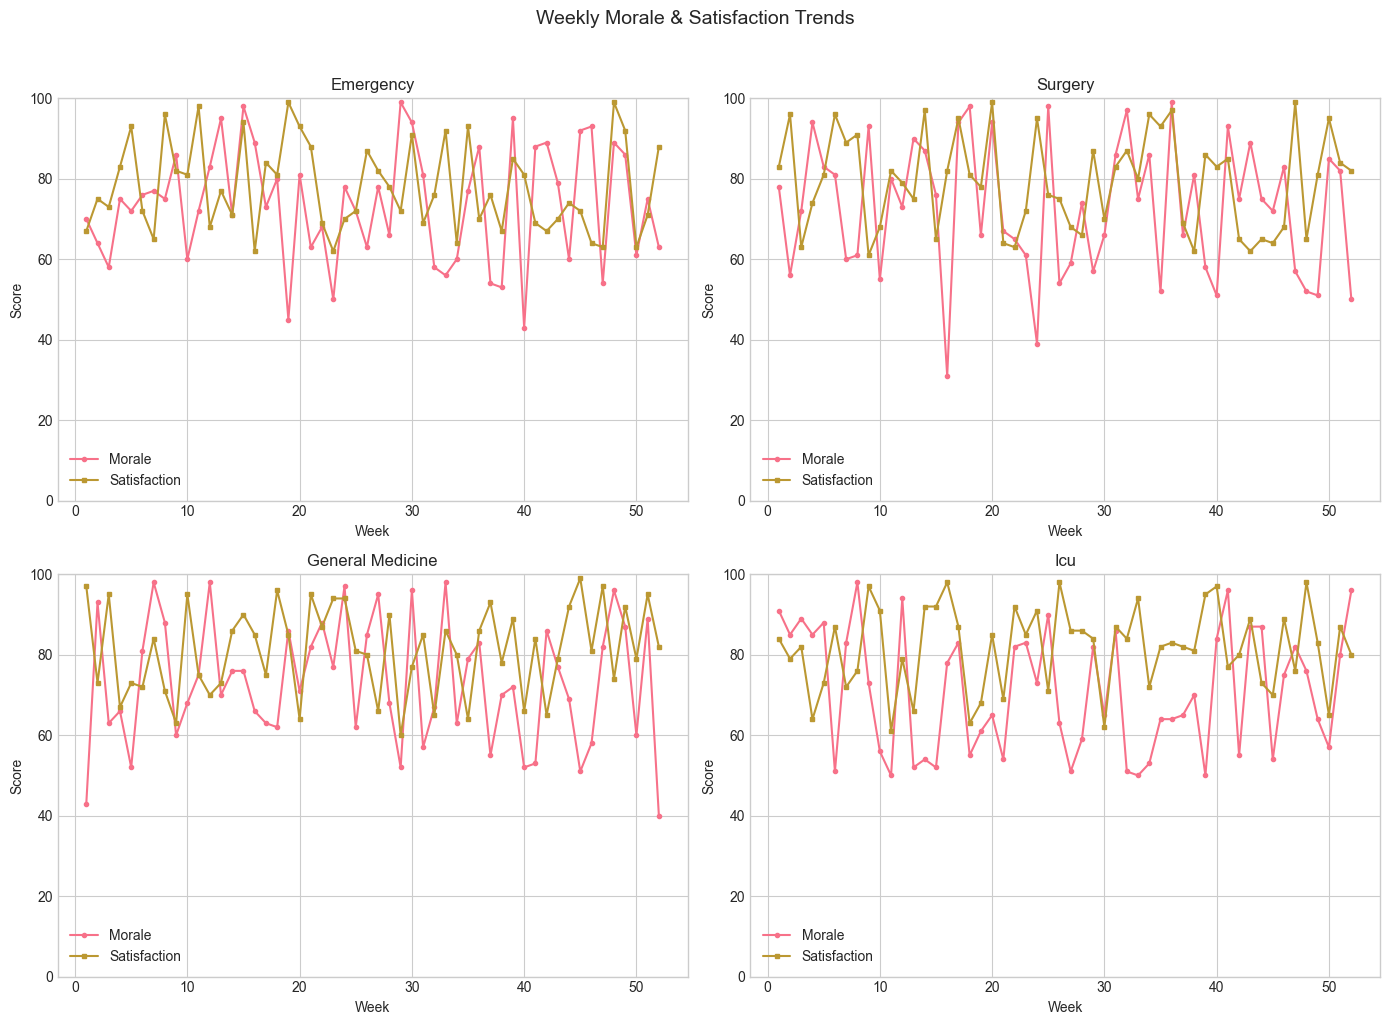

In [36]:
# Weekly trends
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, dept in enumerate(departments):
    dept_data = services_df[services_df['service'] == dept].sort_values('week')
    
    ax = axes.flatten()[idx]
    ax.plot(dept_data['week'], dept_data['staff_morale'], label='Morale', marker='o', markersize=3)
    ax.plot(dept_data['week'], dept_data['patient_satisfaction'], label='Satisfaction', marker='s', markersize=3)
    ax.set_xlabel('Week')
    ax.set_ylabel('Score')
    ax.set_title(f'{dept.replace("_", " ").title()}')
    ax.legend()
    ax.set_ylim(0, 100)

plt.suptitle('Weekly Morale & Satisfaction Trends', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 15. Summary Statistics

In [37]:
# Summary by department
summary = services_df.groupby('service').agg({
    'patient_satisfaction': ['mean', 'std', 'min', 'max'],
    'staff_morale': ['mean', 'std', 'min', 'max'],
    'patients_admitted': ['mean', 'sum'],
    'patients_refused': ['mean', 'sum']
}).round(2)

print("Summary Statistics by Department:")
display(summary)

Summary Statistics by Department:


patient_satisfaction                staff_morale             \
                                 mean    std min max         mean    std min   
service                                                                        
ICU                             81.62  10.32  61  98        70.98  15.39  50   
emergency                       77.88  11.09  62  99        73.56  14.43  43   
general_medicine                81.23  10.96  60  99        73.10  15.53  40   
surgery                         79.27  11.98  61  99        72.63  16.72  31   

                     patients_admitted       patients_refused        
                 max              mean   sum             mean   sum  
service                                                              
ICU               98             12.46   648             2.71   141  
emergency         99             22.79  1185            96.31  5008  
general_medicine  98             44.85  2332            37.27  1938  
surgery           99             32.42  1686            10.67   555

## 16. Key Findings Summary

In [38]:
# Calculate key correlations
print("=" * 60)
print("KEY CORRELATIONS SUMMARY")
print("=" * 60)

# Overall correlations
print("\n1. OVERALL (all departments combined):")
print(f"   Morale <-> Satisfaction: {services_df['staff_morale'].corr(services_df['patient_satisfaction']):.3f}")
print(f"   Beds <-> Admitted: {services_df['available_beds'].corr(services_df['patients_admitted']):.3f}")
print(f"   Admitted <-> Satisfaction: {services_df['patients_admitted'].corr(services_df['patient_satisfaction']):.3f}")
print(f"   Refused <-> Satisfaction: {services_df['patients_refused'].corr(services_df['patient_satisfaction']):.3f}")

# By department
print("\n2. MORALE <-> SATISFACTION BY DEPARTMENT:")
for dept in departments:
    dept_data = services_df[services_df['service'] == dept]
    corr = dept_data['staff_morale'].corr(dept_data['patient_satisfaction'])
    print(f"   {dept}: {corr:.3f}")

# Strongest correlations
print("\n3. STRONGEST CORRELATIONS IN SERVICES DATA:")
corr_flat = services_numeric.corr().unstack().reset_index()
corr_flat.columns = ['var1', 'var2', 'correlation']
corr_flat = corr_flat[corr_flat['var1'] != corr_flat['var2']]
corr_flat['abs_corr'] = corr_flat['correlation'].abs()
corr_flat = corr_flat.drop_duplicates(subset=['abs_corr']).nlargest(10, 'abs_corr')
for _, row in corr_flat.iterrows():
    print(f"   {row['var1']} <-> {row['var2']}: {row['correlation']:.3f}")

KEY CORRELATIONS SUMMARY

1. OVERALL (all departments combined):
   Morale <-> Satisfaction: 0.008
   Beds <-> Admitted: 0.950
   Admitted <-> Satisfaction: -0.002
   Refused <-> Satisfaction: -0.052

2. MORALE <-> SATISFACTION BY DEPARTMENT:
   emergency: 0.042
   surgery: 0.022
   general_medicine: -0.043
   ICU: 0.038

3. STRONGEST CORRELATIONS IN SERVICES DATA:
   week <-> month: 0.995
   patients_request <-> patients_refused: 0.969
   available_beds <-> patients_admitted: 0.950
   patients_refused <-> acceptance_rate: -0.801
   patients_request <-> acceptance_rate: -0.757
   patients_request <-> patients_admitted: 0.371
   available_beds <-> patients_request: 0.262
   patients_admitted <-> staff_morale: 0.145
   month <-> patients_refused: -0.142
   available_beds <-> acceptance_rate: 0.137
